In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
v0 = 0.0
v20 = np.arctanh(0.25)
v60 = np.arctanh(-0.75)
v135 = np.arctanh(-0.71)
v150 = np.arctanh(0.85)
v200 = np.arctanh(0.99)

In [3]:
pf = np.polyfit([0, 20, 60, 135, 150, 200], [v0, v20, v60, v135, v150, v200], 5)

In [4]:
pf

array([ -1.02660604e-09,   3.91809769e-07,  -4.16839163e-05,
         9.01152476e-04,   8.45093641e-03,  -5.80155714e-14])

In [5]:
def y(x, pf):
    return np.tanh(pf[0] * x * x * x * x * x + \
        pf[1] * x * x * x * x + \
        pf[2] * x * x * x + \
        pf[3] * x * x + \
        pf[4] * x + \
        pf[5])

In [6]:
turns = np.arange(201)

In [7]:
vals = np.array([y(x, pf) for x in turns])

In [8]:
advs = 1.0 - vals

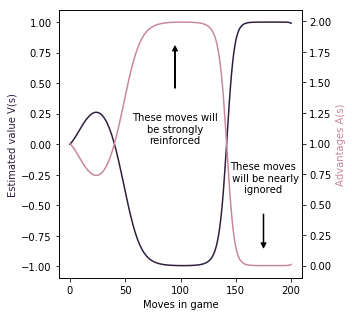

In [12]:
pal = sns.cubehelix_palette(4)

fig = plt.figure(figsize=(5,4.5))
ax1 = fig.add_subplot(111)

ax1.plot(turns, vals, color=pal[3])
ax1.set_xlabel('Moves in game')
ax1.set_ylabel('Estimated value V(s)', color=pal[3])

ax2 = ax1.twinx()
ax2.plot(turns, advs, color=pal[1])
ax2.set_ylabel('Advantages A(s)', color=pal[1])

ax2.annotate('These moves will\nbe strongly\nreinforced',
             xy=(95, 1.98),
             xytext=(95, 1.0),
             arrowprops=dict(facecolor='black', shrink=0.25, width=0.5, headwidth=5, headlength=5),
             horizontalalignment='center')

ax2.annotate('These moves\n will be nearly\nignored',
             xy=(175, 0.0),
             xytext=(175, 0.6),
             arrowprops=dict(facecolor='black', shrink=0.25, width=0.5, headwidth=5, headlength=5),
             horizontalalignment='center')


fig.tight_layout()
plt.savefig('advantage.png', dpi=300)
plt.savefig('advantage.svg')

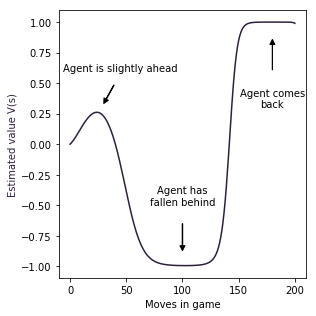

In [10]:
pal = sns.cubehelix_palette(3)

fig = plt.figure(figsize=(4.5,4.5))
ax1 = fig.add_subplot(111)

ax1.plot(turns, vals, color=pal[2])
ax1.set_xlabel('Moves in game')
ax1.set_ylabel('Estimated value V(s)', color=pal[2])

ax1.annotate('Agent is slightly ahead',
             xy=(25, 0.25),
             xytext=(45, 0.6),
             arrowprops=dict(facecolor='black', shrink=0.25, width=0.5, headwidth=5, headlength=5),
             horizontalalignment='center')

ax1.annotate('Agent has\nfallen behind',
             xy=(100, -0.99),
             xytext=(100, -0.5),
             arrowprops=dict(facecolor='black', shrink=0.25, width=0.5, headwidth=5, headlength=5),
             horizontalalignment='center')

ax1.annotate('Agent comes\nback',
             xy=(180, 0.99),
             xytext=(180, 0.3),
             arrowprops=dict(facecolor='black', shrink=0.25, width=0.25, headwidth=5, headlength=5),
             horizontalalignment='center')

fig.tight_layout()
plt.savefig('value.png', dpi=300)
plt.savefig('value.svg')